## Linear Regression

Author :Nutan Mandale

Mentor: Vincent Ramdhanie

In [ ]:
#importing libraries
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# import data
data = pd.read_excel("./table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls")

In [3]:
data.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


### Data Cleaning

In [4]:
data.drop(data.index[0:4], inplace=True)
data.drop(data.index[-3:], inplace=True)

In [5]:
data = data.rename(columns = {'Table 8':'City','Unnamed: 1':'Population','Unnamed: 2':'Violentcrime','Unnamed: 3':'Murder','Unnamed: 4':'Rape1','Unnamed: 5':'Rape','Unnamed: 6':'Robbery','Unnamed: 7':'Aggravatedassault','Unnamed: 8':'Propertycrime','Unnamed: 9':'Burglary','Unnamed: 10':'Larcenythef','Unnamed: 11':'Motorvehicletheft','Unnamed: 12':'Arson3'})

In [6]:
data['Robbery_F'] = data['Robbery'].map(lambda x: 1 if x > 0 else 0)
data['Murder_F'] = data['Murder'].map(lambda x: 1 if x > 0 else 0)
data['pop_square'] = data['Population'].map(lambda x: x*x)

In [7]:
data.head(2)

,City,Population,Violentcrime,Murder,Rape1,Rape,Robbery,Aggravatedassault,Propertycrime,Burglary,Larcenythef,Motorvehicletheft,Arson3,Robbery_F,Murder_F,pop_square
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,0,0,3463321
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,0,0,6640929


In [8]:
data.dropna()

,City,Population,Violentcrime,Murder,Rape1,Rape,Robbery,Aggravatedassault,Propertycrime,Burglary,Larcenythef,Motorvehicletheft,Arson3,Robbery_F,Murder_F,pop_square


In [9]:
data.shape

(348, 16)

### Multivariable_regression

Preparing the data with multivariable regression



$Propertycrime = α + Population + Population^2 + Murder +Robbery$

### Preparing Model

In [10]:
X = data[['Population' ,'Murder', 'Robbery']]
y = data[['Propertycrime']]
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))
X.tail()


(348, 3)
(348, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Population,Murder,Robbery
347,10685,0,2
348,829,0,0
349,5931,0,0
350,199134,6,390
351,36643,0,2


In [11]:
X.tail()

,Population,Murder,Robbery
347,10685,0,2
348,829,0,0
349,5931,0,0
350,199134,6,390
351,36643,0,2


In [12]:
y.shape

(348, 1)

In [13]:
X.shape

(348, 3)

Let us instantiate the mode and find the coefficients ,intercept and R-square

Coefficients: 
 [[  1.21875569e-02   2.28489351e+02  -1.92388628e+00]]
Intercept: 
 [ 87.06579771]
0.998370820591


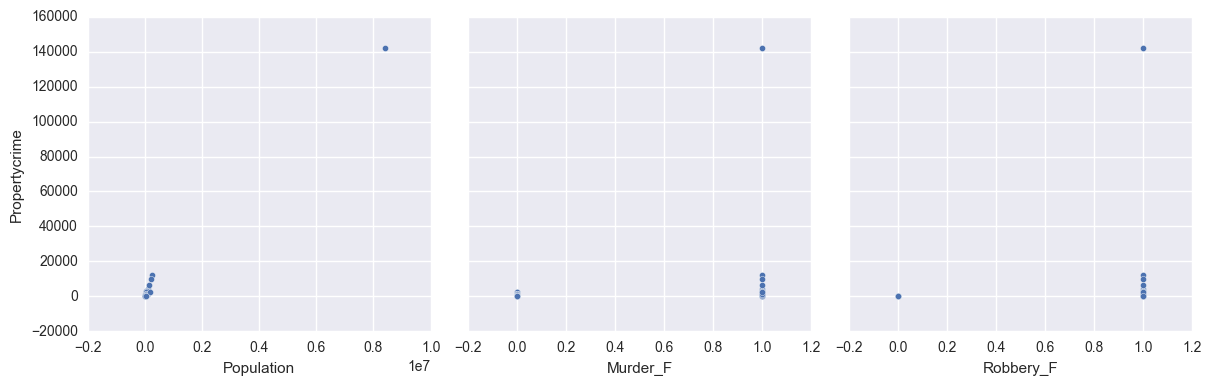

In [20]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X, y))

# Plot outputs
sns.pairplot(
    data[['Population', 'Murder_F', 'Robbery_F', 'Propertycrime']],
    x_vars=['Population', 'Murder_F', 'Robbery_F'], 
    y_vars=['Propertycrime'],
kind='scatter',
size=4)